In [31]:
# all my libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, accuracy_score, roc_curve, auc

In [32]:
# Load the dataset
df_aggregated = pd.read_csv('cluster_labels_k6.csv')  
df_aggregated.head()

,key,Customer Age,Quantity,Revenue,Cost,Unit Price,Unit Cost,Profit Margin,Cluster,Customer Gender,Country,State
0,17.0_F_France_Essonne,17.0,6.0,779.0,801.0,129.833333,133.500,0.090187,0,F,France,Essonne
1,17.0_F_France_Hauts de Seine,17.0,7.0,1355.0,1181.0,312.458333,272.875,0.152743,0,F,France,Hauts de Seine
2,17.0_F_France_Loiret,17.0,3.0,43.0,44.0,14.333333,14.670,-0.023256,0,F,France,Loiret
3,17.0_F_France_Nord,17.0,6.0,1284.0,1380.0,283.777778,300.000,-0.121049,0,F,France,Nord
4,17.0_F_France_Seine (Paris),17.0,10.0,1037.0,907.0,91.466667,82.266,0.045366,0,F,France,Seine (Paris)


In [33]:
df_aggregated_encoded = pd.get_dummies(df_aggregated, columns=['Cluster', 'Customer Gender', 'Country', 'State'], drop_first=True)
df_aggregated_encoded.head()

#This is makes the dataset easier to work with, it makes bool values into 0 and 1
for col in df_aggregated_encoded.select_dtypes(include=['bool']).columns:
    df_aggregated_encoded[col] = df_aggregated_encoded[col].astype(int)

df_aggregated_encoded.head(5)

,key,Customer Age,Quantity,Revenue,Cost,Unit Price,Unit Cost,Profit Margin,Cluster_1,Cluster_2,...,State_Somme,State_South Carolina,State_Texas,State_Utah,State_Val d'Oise,State_Val de Marne,State_Virginia,State_Washington,State_Wyoming,State_Yveline
0,17.0_F_France_Essonne,17.0,6.0,779.0,801.0,129.833333,133.500,0.090187,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17.0_F_France_Hauts de Seine,17.0,7.0,1355.0,1181.0,312.458333,272.875,0.152743,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17.0_F_France_Loiret,17.0,3.0,43.0,44.0,14.333333,14.670,-0.023256,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17.0_F_France_Nord,17.0,6.0,1284.0,1380.0,283.777778,300.000,-0.121049,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0_F_France_Seine (Paris),17.0,10.0,1037.0,907.0,91.466667,82.266,0.045366,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
X_clusters = df_aggregated_encoded[['Cluster_1', 'Cluster_2', 'Cluster_3','Cluster_4','Cluster_5']]

				
y_clust = df_aggregated_encoded['Revenue']


X_train, X_test, y_clust_train, y_clust_test = train_test_split(X_clusters, y_clust, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_clust_train)


y_clust_pred = model.predict(X_test)
#print r^2 score
r2 = r2_score(y_clust_test, y_clust_pred)
print(f"R^2 Score: {r2:.4f}")
# Print accuracy score
accuracy = accuracy_score(y_clust_test, y_clust_pred)
print(f"Accuracy: {accuracy:.4f}")

R^2 Score: 0.7936
Accuracy: 0.0000


In [35]:
# # Generate the normalized confusion matrix
# cm_normalized = confusion_matrix(y_clust_test, y_clust_pred, normalize='true')

# # Plot the normalized confusion matrix
# disp_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
# disp_normalized.plot(cmap=plt.cm.Blues)
# plt.title("Normalized Confusion Matrix")
# plt.show()


In [36]:
coef_df = pd.DataFrame({
    'Feature': X_clusters.columns,
    'Coefficient': model.coef_[0]
})
display(coef_df)

,Feature,Coefficient
0,Cluster_1,-0.045137
1,Cluster_2,-0.238272
2,Cluster_3,-0.101978
3,Cluster_4,-0.048715
4,Cluster_5,-0.247805


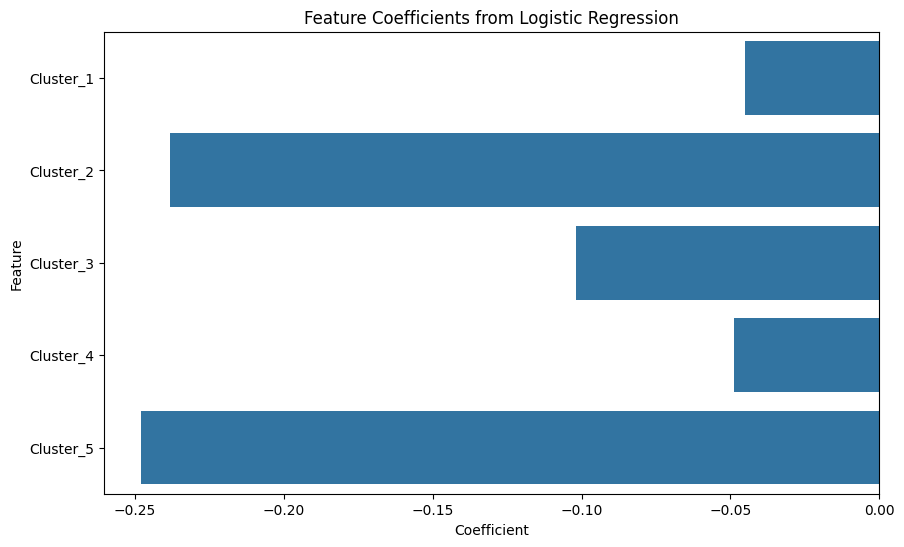

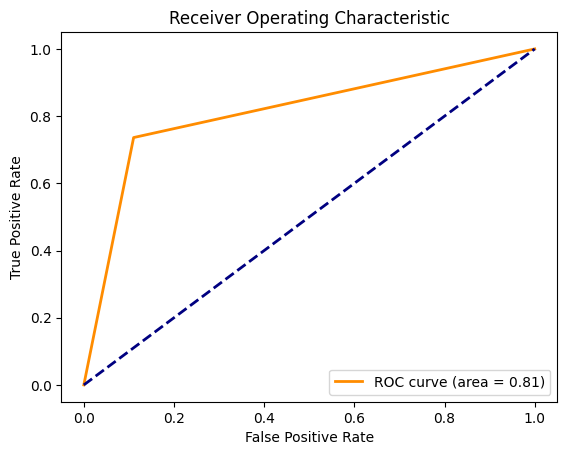

In [37]:
#display a barplot of the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Coefficients from Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

# Plot ROC curve
# Binarize y_clust_test and y_clust_pred for ROC curve calculation
y_clust_test_binary = (y_clust_test > y_clust_test.median()).astype(int)
y_clust_pred_binary = (y_clust_pred > y_clust_test.median()).astype(int)

fpr, tpr, thresholds = roc_curve(y_clust_test_binary, y_clust_pred_binary)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [38]:
df_aggregated_encoded.columns

Index(['key', 'Customer Age', 'Quantity', 'Revenue', 'Cost', 'Unit Price',
       'Unit Cost', 'Profit Margin', 'Cluster_1', 'Cluster_2', 'Cluster_3',
       'Cluster_4', 'Cluster_5', 'Customer Gender_M', 'Country_Germany',
       'Country_United Kingdom', 'Country_United States', 'State_Arizona',
       'State_Bayern', 'State_Brandenburg', 'State_California',
       'State_Charente-Maritime', 'State_England', 'State_Essonne',
       'State_Florida', 'State_Garonne (Haute)', 'State_Georgia',
       'State_Hamburg', 'State_Hauts de Seine', 'State_Hessen',
       'State_Illinois', 'State_Kentucky', 'State_Loir et Cher',
       'State_Loiret', 'State_Massachusetts', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Moselle',
       'State_New York', 'State_Nord', 'State_Nordrhein-Westfalen',
       'State_North Carolina', 'State_Ohio', 'State_Oregon',
       'State_Pas de Calais', 'State_Saarland', 'State_Seine (Paris)',
       'State_Seine Saint Den

In [56]:
#Model option 1: where the features are 'USA', 'state_florida'
X1 = df_aggregated_encoded[['Country_United States', 'State_Florida', 'Cluster_1', 'Cluster_2']]
y1 = df_aggregated_encoded['Revenue']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
model1 = LogisticRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)
r2_1 = r2_score(y1_test, y1_pred)
accuracy_1 = accuracy_score(y1_test, y1_pred)
print(f"R^2 Score for Model 1: {r2_1:.4f}")
# Binarize the target variable (e.g., high revenue = 1, low revenue = 0)
median_revenue = y1.median()
y1_binary = (y1 > median_revenue).astype(int)
y1_train_binary = (y1_train > median_revenue).astype(int)
y1_test_binary = (y1_test > median_revenue).astype(int)

# Train logistic regression on the binary target
model1 = LogisticRegression()
model1.fit(X1_train, y1_train_binary)
y1_pred_binary = model1.predict(X1_test)

# Calculate accuracy
accuracy_1 = (accuracy_score(y1_test_binary, y1_pred_binary)) * 100
print(f"Accuracy for Model 1: {accuracy_1:.4f}")


R^2 Score for Model 1: 0.4855
Accuracy for Model 1: 70.2454


,Feature,Coefficient
0,Country_United States,0.655169
1,Country_United States,0.655169
2,State_Florida,-0.684038
3,State_Florida,-0.684038
4,Cluster_1,2.291869
5,Cluster_2,-1.734436


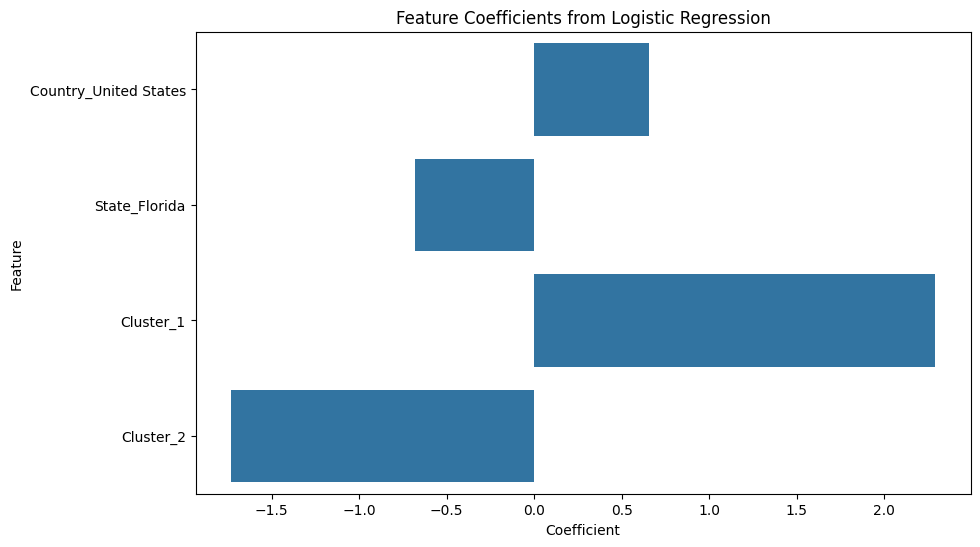

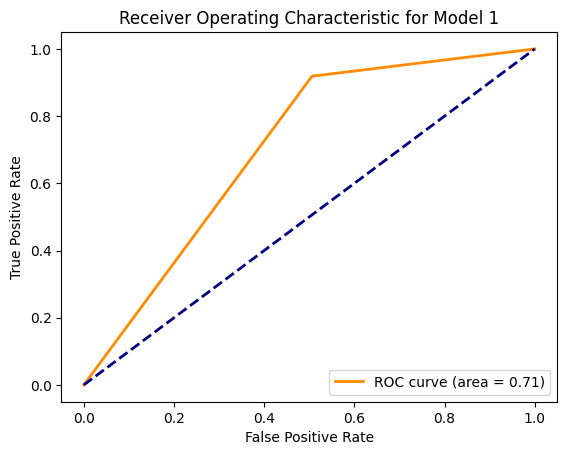

In [57]:
#display feature importance
coef_df1 = pd.DataFrame({
    'Feature': X1.columns,
    'Coefficient': model1.coef_[0]
})
display(coef_df1)
#display a barplot of the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df1)
plt.title('Feature Coefficients from Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()
#display roc curve
fpr1, tpr1, thresholds1 = roc_curve(y1_test_binary, y1_pred_binary)
roc_auc1 = auc(fpr1, tpr1)
# Plot ROC curve
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Model 1')
plt.legend(loc='lower right')
plt.show()


In [58]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'key' column
label_encoder = LabelEncoder()
df_aggregated['key'] = label_encoder.fit_transform(df_aggregated['key'])

# Add the encoded 'key' column to the feature set
X_with_key = pd.concat([df_aggregated[['key']], X1], axis=1)
y = df_aggregated['Revenue']

# Split the data
X_train_with_key, X_test_with_key, y_train, y_test = train_test_split(X_with_key, y, test_size=0.2, random_state=42)

# Train the model
model_with_key = LogisticRegression()
model_with_key.fit(X_train_with_key, y_train)

# Evaluate the model
y_pred_with_key = model_with_key.predict(X_test_with_key)
r2_with_key = r2_score(y_test, y_pred_with_key)
accuracy_with_key = accuracy_score((y_test > y_test.median()).astype(int), (y_pred_with_key > y_test.median()).astype(int))

print(f"R^2 Score with 'key': {r2_with_key:.4f}")
print(f"Accuracy with 'key': {accuracy_with_key:.4f}")

R^2 Score with 'key': -0.3158
Accuracy with 'key': 0.4908


/Users/ggrojas27/Documents/GitHub/INDENG142_Sp25/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,Coefficient
0,key,0.015316
1,Country_United States,-0.076739
2,Country_United States,-0.076739
3,State_Florida,-0.000522
4,State_Florida,-0.000522
5,Cluster_1,-0.013816
6,Cluster_2,-0.094535


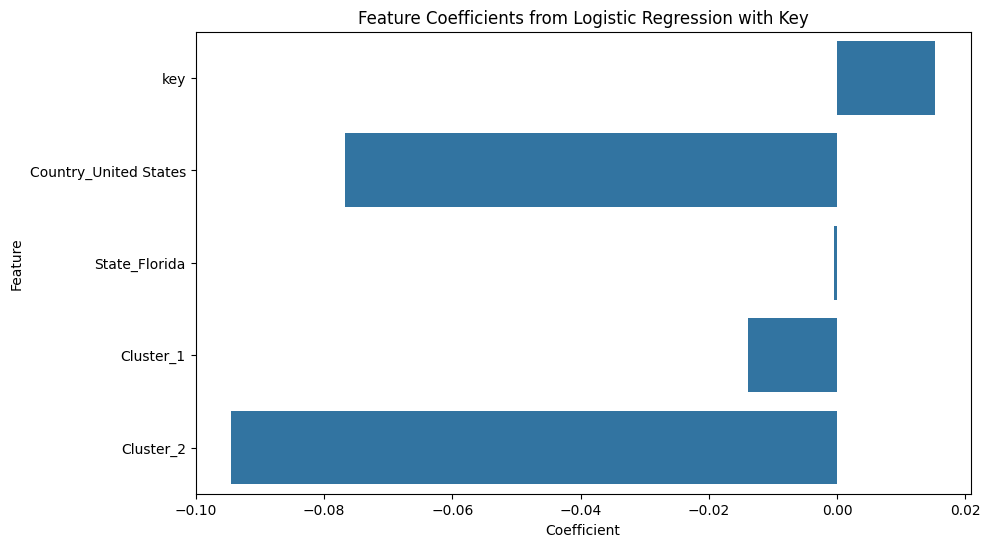

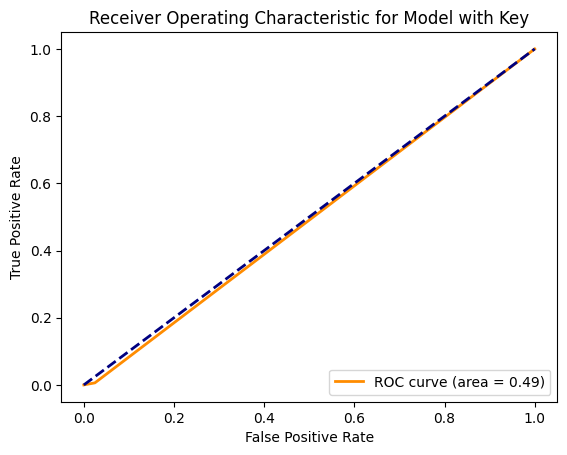

In [59]:
#display feature importance
coef_df2 = pd.DataFrame({
    'Feature': X_with_key.columns,
    'Coefficient': model_with_key.coef_[0]
})
display(coef_df2)

#display a barplot of the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df2)
plt.title('Feature Coefficients from Logistic Regression with Key')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()
#display roc curve
fpr2, tpr2, thresholds2 = roc_curve((y_test > y_test.median()).astype(int), (y_pred_with_key > y_test.median()).astype(int))
roc_auc2 = auc(fpr2, tpr2)
# Plot ROC curve
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Model with Key')
plt.legend(loc='lower right')
plt.show()